# Set up



In [0]:
# Pour avoir l'option d'augmenter la RAM
a=[]
while True:
  a.append(1)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

% cd ~
% cd .. 
# % cd content/drive/My Drive/Spectro/Lab3/
% cd content/drive/My Drive/
% mkdir DonneesProjet3
% cd DonneesProjet3/
% ls


/root
/
/content/drive/My Drive
mkdir: cannot create directory ‘DonneesProjet3’: File exists
/content/drive/My Drive/DonneesProjet3
Cercle1p0_2500Hz.npy     Rectangle_250Hz.npy      SER_rectangle7p5x10.npy
Cercle1p0_250Hz.npy      Rectangle5_2500Hz.npy    SER_triangle_pi6.npy
Cercle1p5_2500Hz.npy     Rectangle7p5_2500Hz.npy  Sweep_pi6api1p3.npy
Cercle1p5_250Hz.npy      Rectangle7p5_250Hz.npy   Triangle_pi2p5_2500Hz.npy
Cercle2p2_2500Hz.npy     SER1001_carre21010.npy   Triangle_pi2p5_250Hz.npy
Cercle2p2_250Hz.npy      SER1001_Carre.npy        Triangle_pi4_2500Hz.npy
Omega1001_carre1010.npy  SER1001_Rectangle.npy    Triangle_pi4_250Hz.npy
Omega1001_Carre.npy      SER3_rectangle_1p0.npy   Triangle_pi6_2500Hz.npy
Omega1001_Rectangle.npy  SER3_rectangle_1p25.npy  Triangle_pi6_250Hz.npy


# Fonctions

In [1]:
import multiprocessing
multiprocessing.cpu_count()

4

In [0]:
import multiprocessing
import numpy as np
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import scipy.sparse.csc, scipy.sparse.linalg

# Importer ce qui est nécessaire pour les fonctions

def p(i, j,Nx):
    """Le noeud (i,j) correspond à la ligne L de la matrice A"""
    # J'ai modifié pour tenir compte de la convention de Python:
    L = (i) + (j) * Nx
    return L


# Emplacement du bois:
def Bois(Map, centre_bois_x, centre_bois_y, Nx_Bois, Ny_Bois):
    """Cette fonction va placer les points pour le bois et les frontières du bois. Lorsqu'il s'agit de bois pur\
    (pas une frontière), le # du point est 2. Les autres points aux frontières sont numérotés de 3 à 10 selon\
    la convention exprimé ci-haut,
    Nx et Ny doivent être des multiples de 2\
    Il faudra modifier cette fonction lorsqu'on voudra ajouter des formes plus compliquées"""
    # On met tout en bois
    Map[int(centre_bois_x - Nx_Bois / 2):int(centre_bois_x + Nx_Bois / 2) + 1,
    int(centre_bois_y - Ny_Bois / 2):int(centre_bois_y + Ny_Bois / 2) + 1] = 2
    # On traite les frontières
    # Point 3
    Map[int(centre_bois_x - Nx_Bois / 2), int(centre_bois_y - Ny_Bois / 2)] = 3
    # Point 4
    Map[int(centre_bois_x - Nx_Bois / 2) + 1:int(centre_bois_x + Nx_Bois / 2), int(centre_bois_y - Ny_Bois / 2)] = 4
    # Point 5
    Map[int(centre_bois_x + Nx_Bois / 2), int(centre_bois_y - Ny_Bois / 2)] = 5
    # Point 6
    Map[int(centre_bois_x + Nx_Bois / 2), int(centre_bois_y - Ny_Bois / 2) + 1:int(centre_bois_y + Ny_Bois / 2)] = 6
    # Point 7
    Map[int(centre_bois_x + Nx_Bois / 2), int(centre_bois_y + Ny_Bois / 2)] = 7
    # Point 8
    Map[int(centre_bois_x - Nx_Bois / 2) + 1:int(centre_bois_x + Nx_Bois / 2), int(centre_bois_y + Ny_Bois / 2)] = 8
    # Point 9
    Map[int(centre_bois_x - Nx_Bois / 2), int(centre_bois_y + Ny_Bois / 2)] = 9
    # Point 10
    Map[int(centre_bois_x - Nx_Bois / 2), int(centre_bois_y - Ny_Bois / 2) + 1:int(centre_bois_y + Ny_Bois / 2)] = 10
    return Map

# Emplacement du nez du bois:
def Boisnez(Map, centre_bois_x, centre_bois_y, Nx_Bois, Ny_Bois, forme, coeff):
    # forme peut-etre soit un triangle ou un cercle
    # coeff est un angle en radian de la pointe pour le triangle ou le rayon du cercle
    if forme == 'triangle':
        hauteur = Nx_Bois/(2*np.tan(coeff/2))
        larg = Nx_Bois
        i=0
        up=1
        larg2 = larg
        while int(larg) > 1:
            if up == 1:
                # On met toute la pointe en bois
                Map[int(centre_bois_x-larg/2):int(centre_bois_x+larg/2)+1,int(centre_bois_y-Ny_Bois/2)-i]=2
                # On ajoute le contour
                Map[int(centre_bois_x-larg/2),int(centre_bois_y-Ny_Bois/2)-i]=11
                Map[int(centre_bois_x+larg/2),int(centre_bois_y-Ny_Bois/2)-i]=12
            else:
                Map[int(centre_bois_x-larg/2),int(centre_bois_y-Ny_Bois/2)-i]=11
                Map[int(centre_bois_x+larg/2),int(centre_bois_y-Ny_Bois/2)-i]=12
            larg1 = larg +1
            larg2 = larg
            i+=1
            larg = round(2*(hauteur-i)*np.tan(coeff/2))
            if (larg == larg2-2) or (larg == larg2-1) or (larg == larg2):
                up=1
            else:
                i-=1
                larg = larg2 - 1
                up=0
                
        # Pour ajouter la derniere pointe
        if up == 0:
            i+=1
        if larg1 == 3:
            Map[int(centre_bois_x-(larg1-1)/2+1),int(centre_bois_y-Ny_Bois/2)-i]=4
            #Map[int(centre_bois_x-larg/2),int(centre_bois_y-Ny_Bois/2)-i]=4
        else:
            Map[int(centre_bois_x-(larg1-2)/2):int(centre_bois_x+(larg1-2)/2),int(centre_bois_y-Ny_Bois/2)-i]=4
            
    elif forme == 'cercle':
        # hauteur est la distance entre le centre du cercle et le cote du rectangle
        hauteur = np.sqrt(coeff**2-(Nx_Bois/2)**2)
        centre_y = centre_bois_y - Ny_Bois/2 + hauteur
        x_val = np.arange(centre_bois_x-(Nx_Bois/2),centre_bois_x+Nx_Bois/2+1)
        for x in x_val:
            pos_y = round(-np.sqrt(int((coeff)**2 - (x-centre_bois_x)**2)) + centre_y)
            # Pour faire la frontiere du demi-cercle
            Map[int(x),int(pos_y)]=13
            if pos_y < (centre_bois_y-Ny_Bois/2+1):
                # Pour faire l'interieur du demi-cercle
                Map[int(x),(int(pos_y+1)):int(centre_bois_y-Ny_Bois/2+1)] = 2
        # Pour s'assurer qu'il n'y a pas de trou dans la frontiere du demi-cercle
        x_val1 = np.arange(centre_bois_x-Nx_Bois/2+1,centre_bois_x+Nx_Bois/2)
        for x in x_val1:
            pos_y = round(-np.sqrt(int((coeff)**2 - (x-centre_bois_x)**2)) + centre_y)
            for i in np.arange(1,5):
                if (Map[int(x),int(pos_y+i)] != 6 and Map[int(x-1),int(pos_y+i)] == 1 and Map[int(x-1),int(pos_y)] == 1 \
                    and x < centre_bois_x) or (Map[int(x),int(pos_y+i)] != 6 and Map[int(x+1),int(pos_y+i)] == 1 \
                                               and Map[int(x+1),int(pos_y)] == 1 and x > centre_bois_x):
                    Map[int(x),int(pos_y+i)]=13
    else:
        print('La variable de forme a ete mal defini.')
    return Map

# Calcul surface du demi-cercle
def surfdemicercle(S_x,S_y,centre_bois_x,centre_cercle_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff):
    limite_pente = (-(-2*S_y*centre_bois_x+2*centre_bois_x*centre_cercle_y+2*S_x*(S_y-centre_cercle_y))+(np.sqrt((-2*S_y*centre_bois_x+2*centre_bois_x*centre_cercle_y+2*S_x*(S_y-centre_cercle_y))**2 - (4*(2*S_x*centre_bois_x+coeff**2-centre_bois_x**2-S_x**2)*(coeff**2-(S_y-centre_cercle_y)**2)))))/(2*(2*S_x*centre_bois_x+coeff**2-centre_bois_x**2-S_x**2))
    limite_b = S_y - limite_pente*S_x
    limite_x = (centre_bois_x-limite_pente*(limite_b - centre_cercle_y))/(limite_pente**2 + 1)
    limite_y = limite_x*limite_pente + limite_b
    surf = 2*coeff*np.arcsin((np.sqrt((limite_x - centre_bois_x-Nx_Bois/2)**2 + (centre_bois_y-Ny_Bois/2 - limite_y)**2))/(2*coeff))
    return surf

# Calcul coin_pente
def coinpente(S_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff,cote):
    if coeff != Nx_Bois/2 and S_y > centre_bois_y - Ny_Bois/2:
        coin_pente = cote*(Nx_Bois/2)/(-np.sqrt(coeff**2 - (Nx_Bois/2)**2))
    elif coeff == Nx_Bois/2 and S_y > centre_bois_y - Ny_Bois/2:
        coin_pente = -999*cote
    elif coeff != Nx_Bois/2 and S_y <= centre_bois_y - Ny_Bois/2:
        coin_pente = cote*(Nx_Bois/2)/(np.sqrt(coeff**2 - (Nx_Bois/2)**2))
    else:
        coin_pente = 999*cote
    return coin_pente

# Surface en contact direct avec la source
def surface_directe(S_x, S_y, centre_bois_x, centre_bois_y, Nx_Bois, Ny_Bois, forme, coeff):
    if S_x < (centre_bois_x-Nx_Bois/2):
        if forme == 'triangle':
            y_min = centre_bois_y - Ny_Bois/2 + (centre_bois_x-Nx_Bois/2-S_x)/np.tan(coeff/2)
            y_max = centre_bois_y - Ny_Bois/2 - Nx_Bois/(2*np.tan(coeff/2)) - (centre_bois_x-S_x)/np.tan(coeff/2)
            if S_y <= y_max:
                surf = 2*(Nx_Bois/2)/(np.sin(coeff/2))
            elif S_y <= y_min and S_y > y_max:
                surf = (Nx_Bois/2)/(np.sin(coeff/2))
            elif S_y > y_min and S_y <= (centre_bois_y + Ny_Bois/2):
                surf = 0
            else:
                surf = Nx_Bois
        elif forme == 'cercle':
            centre_cercle_y = centre_bois_y - Ny_Bois/2 + np.sqrt(coeff**2-(Nx_Bois/2)**2)
            coin_pente = coinpente(S_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff,1)
            
            if S_y > centre_bois_y - Ny_Bois/2:
                S_pente = (centre_bois_y-Ny_Bois/2 - S_y)/(centre_bois_x-Nx_Bois/2 - S_x)
                if S_pente > coin_pente:
                    #calcul arc
                    surf = surfdemicercle(S_x,S_y,centre_bois_x,centre_cercle_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff)
                elif S_pente <= coin_pente and S_y <= (centre_bois_y + Ny_Bois/2):
                    surf = 0
                else:
                    surf = Nx_Bois
            elif S_y <= centre_bois_y - Ny_Bois/2 and S_y >= centre_cercle_y-coeff:
                surf = surfdemicercle(S_x,S_y,centre_bois_x,centre_cercle_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff)
            elif S_y < centre_cercle_y-coeff:
                S_pente = (centre_bois_y-Ny_Bois/2 - S_y)/(centre_bois_x+Nx_Bois/2 - S_x)
                if S_pente < coin_pente:
                    surf = surfdemicercle(S_x,S_y,centre_bois_x,centre_cercle_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff)
                else:
                    surf = 2*coeff*np.arcsin(Nx_Bois/(2*coeff))
        surface = Ny_Bois + surf
    elif S_x >= (centre_bois_x-Nx_Bois/2) and S_x <= (centre_bois_x+Nx_Bois/2):
        if forme == 'triangle':
            if S_x < centre_bois_x:
                y_max = centre_bois_y - Ny_Bois/2 - Nx_Bois/(2*np.tan(coeff/2)) - (centre_bois_x-S_x)/np.tan(coeff/2)
                if S_y < y_max:
                    surface = 2*(Nx_Bois/2)/(np.sin(coeff/2))
                elif S_y < (centre_bois_y-Ny_Bois/2) and S_y >= y_max:
                    surface = (Nx_Bois/2)/(np.sin(coeff/2))
                elif S_y > (centre_bois_y+Ny_Bois/2):
                    surface = Nx_Bois
            elif S_x == centre_bois_x:
                if S_y < (centre_bois_y-Ny_Bois/2):
                    surface = 2*(Nx_Bois/2)/(np.sin(coeff/2))
                elif S_y > (centre_bois_y+Ny_Bois/2):
                    surface = Nx_Bois
            elif S_x > centre_bois_x:
                y_max = centre_bois_y - Ny_Bois/2 - Nx_Bois/(2*np.tan(coeff/2)) - (S_x-centre_bois_x)/np.tan(coeff/2)
                if S_y < y_max:
                    surface = 2*(Nx_Bois/2)/(np.sin(coeff/2))
                elif S_y < (centre_bois_y-Ny_Bois/2) and S_y >= y_max:
                    surface = (Nx_Bois/2)/(np.sin(coeff/2))
                elif S_y > (centre_bois_y+Ny_Bois/2):
                    surface = Nx_Bois

        elif forme == 'cercle':
       
            centre_cercle_y = centre_bois_y - Ny_Bois/2 + np.sqrt(coeff**2-(Nx_Bois/2)**2)
            if S_y > (centre_bois_y+Ny_Bois/2):
                surface = Nx_Bois
            elif S_x < centre_bois_x:
                surface = surfdemicercle(S_x,S_y,centre_bois_x,centre_cercle_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff)
            elif S_x == centre_bois_x:
                surface = 2*coeff*np.arcsin(Nx_Bois/(2*coeff))
            elif S_x > centre_bois_x:
                surface = 2*coeff*np.arcsin(Nx_Bois/(2*coeff)) - surfdemicercle(S_x,S_y,centre_bois_x,centre_cercle_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff)
    elif S_x > (centre_bois_x+Nx_Bois/2):
        if forme == 'triangle':
            y_min = centre_bois_y - Ny_Bois/2 + (S_x - centre_bois_x-Nx_Bois/2)/np.tan(coeff/2)
            y_max = centre_bois_y - Ny_Bois/2 - Nx_Bois/(2*np.tan(coeff/2)) - (S_x-centre_bois_x)/np.tan(coeff/2)
            if S_y <= y_max:
                surf = 2*(Nx_Bois/2)/(np.sin(coeff/2))
            elif S_y <= y_min and S_y > y_max:
                surf = (Nx_Bois/2)/(np.sin(coeff/2))
            elif S_y > y_min and S_y <= (centre_bois_y + Ny_Bois/2):
                surf = 0
            else:
                surf = Nx_Bois
        elif forme == 'cercle':
            centre_cercle_y = centre_bois_y - Ny_Bois/2 + np.sqrt(coeff**2-(Nx_Bois/2)**2)
            coin_pente = coinpente(S_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff,-1)
            
            if S_y > centre_bois_y - Ny_Bois/2:
                S_pente = (centre_bois_y-Ny_Bois/2 - S_y)/(S_x - centre_bois_x-Nx_Bois/2)
                if S_pente < coin_pente:
                    #calcul arc
                    surf = 2*coeff*np.arcsin(Nx_Bois/(2*coeff)) - surfdemicercle(S_x,S_y,centre_bois_x,centre_cercle_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff)
                elif S_pente >= coin_pente and S_y <= (centre_bois_y + Ny_Bois/2):
                    surf = 0
                else:
                    surf = Nx_Bois
            elif S_y <= centre_bois_y - Ny_Bois/2 and S_y >= centre_cercle_y-coeff:
                surf = 2*coeff*np.arcsin(Nx_Bois/(2*coeff)) - surfdemicercle(S_x,S_y,centre_bois_x,centre_cercle_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff)
            elif S_y < centre_cercle_y-coeff:
                S_pente = -(centre_bois_y-Ny_Bois/2 - S_y)/(S_x - centre_bois_x+Nx_Bois/2)
                if S_pente < coin_pente:
                    surf = 2*coeff*np.arcsin(Nx_Bois/(2*coeff)) - surfdemicercle(S_x,S_y,centre_bois_x,centre_cercle_y,Nx_Bois,Ny_Bois,centre_bois_y,coeff)
                else:
                    surf = 2*coeff*np.arcsin(Nx_Bois/(2*coeff))
        surface = Ny_Bois + surf
    return surface


# Emplacement des PML
def PML1(Map, N_PML):
    """Cette fonction vient placer les points de PML selon la convention décrite ci haut"""
    # Point 14
    Map[0:N_PML, -N_PML:] = 14
    # Point 15
    Map[N_PML:-N_PML, -N_PML:] = 15
    # Point 16
    Map[-N_PML:, -N_PML:] = 16
    # Point 17
    Map[-N_PML:, N_PML:-N_PML] = 17
    # Point 18
    Map[-N_PML:, 0:N_PML] = 18
    # Point 19
    Map[N_PML:-N_PML, 0:N_PML] = 19
    # Point 20
    Map[0:N_PML, 0:N_PML] = 20
    # Point 21
    Map[0:N_PML, N_PML:-N_PML] = 21
    return Map

# Emplacement des PML
def PML2(Map, N_PML):
    """Cette fonction vient placer les points de PML selon la convention décrite ci haut"""
    # Point 14
    Map[1:-1, 1:N_PML] = 22
    # Point 15
    Map[1:N_PML, 1:-1] = 22
    # Point 16
    Map[1:-1, -N_PML:-1] = 22
    # Point 17
    Map[-N_PML:-1, 1:-1] = 22

    return Map

# Emplacement de la source
def Source(Map, S_x, S_y):
    Map[S_x, S_y] = 0
    return Map





# Coefficients aux frontières
def Coeff_Frontiere(gamma1, gamma2, nx, ny):
    return [nx / gamma1, -4 * nx / gamma1, ny / gamma1, -4 * ny / gamma1,
            (nx + ny) * (gamma1 + gamma2) / (gamma1 + gamma2) \
        , -4 * nx / gamma2, nx / gamma2, -4 * ny / gamma2, ny / gamma2]  # Version avec gradient


# [nx/gamma1,-2*nx/gamma1,ny/gamma1,-2*ny/gamma1,(nx+ny)*gamma1*gamma2/(gamma1-gamma2),2*nx/gamma2,-nx/gamma2,
# 2*ny/gamma2,-2*ny/gamma2]


# Coefficients pour les PML
def Coeff_PML(Type, i, j, h, Nx, Ny, k2_eau,v_eau,N_PML):
    k = np.sqrt(k2_eau) # p-e seulement la partie réelle de k2eau?
    beta = 1

    x = i * h 
    y = j * h   # Pour éviter les divisions par 0 ?

    if np.logical_or(np.logical_or(i==0,i==Ny-1),np.logical_or(j==0,j==Nx-1)):

    #Couche sur les bords extérieurs
        if Type == 14:
            Coeff = [0,0,0,0,1,0,0,0,0]
            
        if Type == 15:
            Coeff = [0,0,0,0,1,0,0,0,0]

        if Type == 16:
            Coeff = [0,0,0,0,1,0,0,0,0]
            
        if Type == 17:
            Coeff = [0,0,0,0,1,0,0,0,0]

        if Type == 18:
            Coeff = [0,0,0,0,1,0,0,0,0]
            
        if Type == 19:
            Coeff = [0,0,0,0,1,0,0,0,0]

        if Type == 20:
            Coeff = [0,0,0,0,1,0,0,0,0]

        if Type == 21:
            Coeff = [0,0,0,0,1,0,0,0,0]    
            
            
    else:
        if Type == 14:
            x0 = 0
            y0 = h * (Ny)  # Ny ou Ny-1 ???
            Beta_x = 1j *beta *(x0-x) / (np.abs(x0 - x)**2 * (k * np.abs(x0 - x) + 1j*beta))
            Beta_y = 1j *beta *(y0-y) / (np.abs(y0 - y)**2 * (k * np.abs(y0 - y) + 1j*beta))
            Gamma_x = 1 + 1j / k / (np.abs(x0 - x)) *beta
            Gamma_y = 1 + 1j / k / (np.abs(y0 - y)) *beta
            Coeff = [0,Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2) ,0,Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2)\
                     ,-2/((Gamma_y)**2)-2/((Gamma_x)**2)+k**2*h**2,-Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2),0,-Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2),0]

        if Type == 15:
            y0 = h * (Ny)  # Ny ou Ny-1 ???
            Beta_x = 0
            Beta_y = 1j *beta *(y0-y) / (np.abs(y0 - y)**2 * (k * np.abs(y0 - y) + 1j*beta))
            Gamma_x = 1
            Gamma_y = 1 + 1j / k / (np.abs(y0 - y)) *beta
            if j == Nx-N_PML:
                Coeff = [0,0,-Gamma_y,4*Gamma_y,(-3*Gamma_y-3),0,0,4,-1]
            else:    
                Coeff = [0,Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2) ,0,Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2)\
                         ,-2/((Gamma_y)**2)-2/((Gamma_x)**2)+k**2*h**2,-Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2),0,-Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2),0]


        if Type == 16:
            x0 = h * (Nx)  # Nx ou Nx-1 ???
            y0 = h * (Ny)  # Ny ou Ny-1 ???
            Beta_x = 1j *beta *(x0-x) / (np.abs(x0 - x)**2 * (k * np.abs(x0 - x) + 1j*beta))
            Beta_y = 1j *beta *(y0-y) / (np.abs(y0 - y)**2 * (k * np.abs(y0 - y) + 1j*beta))
            Gamma_x = 1 + 1j / k / (np.abs(x0 - x)) *beta
            Gamma_y = 1 + 1j / k / (np.abs(y0 - y)) *beta
            Coeff = [0,Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2) ,0,Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2)\
                     ,-2/((Gamma_y)**2)-2/((Gamma_x)**2)+k**2*h**2,-Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2),0,-Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2),0]

        if Type == 17:
            x0 = h * (Nx)  # Nx ou Nx-1 ???
            Beta_x = 1j *beta *(x0-x) / (np.abs(x0 - x)**2 * (k * np.abs(x0 - x) + 1j*beta))
            Beta_y = 0
            Gamma_x = 1 + 1j / k / (np.abs(x0 - x)) *beta
            Gamma_y = 1
            if i == Ny-N_PML:
                Coeff = [-Gamma_x,4*Gamma_x,0,0,(-3*Gamma_x-3),4,-1,0,0]
            else:    
                Coeff = [0,Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2) ,0,Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2)\
                         ,-2/((Gamma_y)**2)-2/((Gamma_x)**2)+k**2*h**2,-Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2),0,-Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2),0]


        if Type == 18:
            x0 = h * (Nx)  # Nx ou Nx-1 ???
            y0 = 0
            Beta_x = 1j *beta *(x0-x) / (np.abs(x0 - x)**2 * (k * np.abs(x0 - x) + 1j*beta))
            Beta_y = 1j *beta *(y0-y) / (np.abs(y0 - y)**2 * (k * np.abs(y0 - y) + 1j*beta))
            Gamma_x = 1 + 1j / k / (np.abs(x0 - x)) *beta
            Gamma_y = 1 + 1j / k / (np.abs(y0 - y)) *beta
            Coeff = [0,Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2) ,0,Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2)\
                     ,-2/((Gamma_y)**2)-2/((Gamma_x)**2)+k**2*h**2,-Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2),0,-Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2),0]

        if Type == 19:
            y0 = 0
            Beta_x = 0
            Beta_y = 1j *beta *(y0-y) / (np.abs(y0 - y)**2 * (k * np.abs(y0 - y) + 1j*beta))
            Gamma_x = 1
            Gamma_y = 1 + 1j / k / (np.abs(y0 - y)) *beta
            
            if j == N_PML-1:
                Coeff = [0,0,-1,4,(-3*Gamma_y-3),0,0,4*Gamma_y,-Gamma_y]
            else:    
                Coeff = [0,Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2) ,0,Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2)\
                         ,-2/((Gamma_y)**2)-2/((Gamma_x)**2)+k**2*h**2,-Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2),0,-Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2),0]


        if Type == 20:
            x0 = 0
            y0 = 0
            Beta_x = 1j *beta *(x0-x) / (np.abs(x0 - x)**2 * (k * np.abs(x0 - x) + 1j*beta))
            Beta_y = 1j *beta *(y0-y) / (np.abs(y0 - y)**2 * (k * np.abs(y0 - y) + 1j*beta))
            Gamma_x = 1 + 1j / k / (np.abs(x0 - x)) *beta
            Gamma_y = 1 + 1j / k / (np.abs(y0 - y)) *beta
            Coeff = [0,Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2) ,0,Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2)\
                     ,-2/((Gamma_y)**2)-2/((Gamma_x)**2)+k**2*h**2,-Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2),0,-Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2),0]

        if Type == 21:
            x0 = 0
            Beta_x = 1j *beta *(x0-x) / (np.abs(x0 - x)**2 * (k * np.abs(x0 - x) + 1j*beta))
            Beta_y = 0
            Gamma_x = 1 + 1j / k / (np.abs(x0 - x)) *beta
            Gamma_y = 1 
            if i == N_PML-1:
                Coeff = [-1,4,0,0,(-3*Gamma_x-3),4*Gamma_x,-Gamma_x,0,0]
            else:    
                Coeff = [0,Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2) ,0,Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2)\
                         ,-2/((Gamma_y)**2)-2/((Gamma_x)**2)+k**2*h**2,-Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2),0,-Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2),0]



#        Coeff = [0,-Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2) ,0,-Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2)\
#            ,-2/((Gamma_x)**2)-2/((Gamma_y)**2)+k**2*h**2,Beta_x/2*h/(Gamma_x**2)+1/(Gamma_x**2),0,Beta_y/2*h/(Gamma_y**2)+1/(Gamma_y**2),0]
        
        
    return Coeff

# Coefficients pour les PML
def Coeff_PML2(Type, h, Nx, Ny,omega,B_eau,alpha,rho_eau):
    k2_eau = rho_eau * (omega ** 2 / B_eau + 2j * omega * alpha)
    k2=k2_eau
    if Type == 14:
        Coeff = [0,0 ,1,-2 ,2+h**2*k2,-2,1,0,0]
    if Type == 15:
        Coeff = [0,1,1,-2 ,-1+h**2*k2,1,0,0,0]
    if Type == 16:
        Coeff = [1,-2,1,-2,2+h**2*k2,0,0,0,0]
    if Type == 17:
        Coeff = [1,-2,0,1,-1+h**2*k2,0,0,1,0]
    if Type == 18:
        Coeff = [1,-2,0,0,2+h**2*k2,0,0,-2,1]
    if Type == 19:
        Coeff = [0,1,0,0,-1+h**2*k2,1,0,-2,1]
    if Type == 20:
        Coeff = [0,0,0,0,2+h**2*k2,-2,1,-2,1]
    if Type == 21:
        Coeff = [0,0,0,1,-1+h**2*k2,-2,1,1,0]
    if Type == 22:
        Coeff = [0,1,0,1,-4+h**2*k2,1,0,1,0]


    return Coeff

def Construction_alpha_Map(Nx,Ny,alpha_eau, alpha_PML,N_PML):
    grid = np.ones([Ny, Nx])
    d_alpha = (alpha_PML - alpha_eau) / N_PML
    grid = grid * alpha_eau
    for i in range(N_PML):
        grid[-i - 1, i:-i - 1] = (N_PML - i+2) * d_alpha
        grid[i, i:-i - 1] = (N_PML - i+2) * d_alpha
        grid[i:-i - 1, i] = (N_PML - i+2) * d_alpha
        grid[i:-i - 1, -i - 1] = (N_PML - i+2) * d_alpha
        grid[Nx - (i + 1), Ny - (i + 1)] = (N_PML - i+2) * d_alpha
    alpha_Map=grid
    return alpha_Map

def Construction_Map(Nx,Ny,Nx_Bois,Ny_Bois,centre_bois_x, centre_bois_y,forme,coeff,S_x,S_y,dx,N_PML,plot=True, \
                     PML_mode=1,Bateau=True, Boisnez_bool=True):
    Map = np.ones([Ny, Nx])
    # Création de la map avec les points
    if Bateau==True:
        Map = Bois(Map, centre_bois_x, centre_bois_y, Nx_Bois, Ny_Bois)
        if Boisnez_bool==True:
            Map=Boisnez(Map, centre_bois_x, centre_bois_y, Nx_Bois, Ny_Bois, forme, coeff)
    if PML_mode==1:
        Map = PML1(Map, N_PML)
    if PML_mode==2:
        Map = PML1(Map, N_PML)
        Map= PML2(Map, N_PML)

    Map = Source(Map, S_x, S_y)



    Display_Map = np.copy(Map)
    # Les deux cas de PML
    Display_Map[np.logical_and(Map > 10, Map <= 22)] = 0
    Display_Map[Map == 22] = 0

    Display_Map[np.logical_or(np.logical_and(Map >= 2, Map < 14),Map>=11)] = 3
    ## La source
    Display_Map[Map == 0] = 5

    if plot==True:

        fig,ax=plt.subplots(1,2,figsize=(11,8))
        cmap = plt.cm.get_cmap('jet', 22)

        ax[0].imshow(np.transpose(Map), cmap=cmap)
        #cbar = plt.colorbar(ticks=np.arange(1, 11), norm=np.arange(1, 11),ax=ax[0])
        ax[0].set_title("La carte, chaque couleur=1 type de point", fontsize=15)
        ax[0].set_xlabel("x", fontsize=11)
        ax[0].set_ylabel("y", fontsize=11)

        #cmap = plt.cm.get_cmap('jet', 5)
        ax[1].imshow(np.transpose(Display_Map), cmap=cmap)
        ax[1].set_title("Map Physique", fontsize=15)
        ax[1].set_xlabel("x", fontsize=11)
        ax[1].set_ylabel("y", fontsize=11)
        plt.show()

    return Map, Display_Map



def Source_Cylindrique(Nx,Ny,S_x,S_y,dx,k2_eau,plot=False):
        Source_Map = np.zeros([Ny, Nx], dtype=np.complex)
        h = dx
    
        ## Pourrait probablement être intégré dans la construction de A...
        for i in range(Ny):
            for j in range(Nx):
                r = np.sqrt((i - S_x) ** 2 + (j - S_y) ** 2) * h
            
                if r == 0:
                    Source_Map[i, j] = 0.5
                else:
                    # Vérifier si on devrait pas prendre la -1j*k2_eau*r
                    Source_Map[i, j] = np.exp(1j *np.sqrt(np.real(k2_eau)) * r) / np.sqrt(r)

        if plot==True:
            fig, ax = plt.subplots(1, 1, figsize=(11, 8))
            cmap = plt.cm.get_cmap('jet', 22)

            ax.imshow(np.transpose(np.real(Source_Map)), cmap=cmap)
            ax.set_title("La source cylindrique", fontsize=15)
            ax.set_xlabel("x", fontsize=11)
            ax.set_ylabel("y", fontsize=11)
            plt.show()
        return Source_Map


def Source_Lineaire(Nx,Ny,S_x,S_y,theta,dx,k2_eau,n_eau,plot=False):
        Source_Map = np.zeros([Nx, Ny], dtype=np.complex)
        h = dx
        theta = np.deg2rad(90+theta)
        ## Pourrait probablement être intégré dans la construction de A...
        for i in range(Nx):
            for j in range(Ny):
                Source_Map[i, j] = np.exp(-1j*k2_eau*n_eau*((i)*h*np.sin(theta) + (j)*h*np.cos(theta)))

        if plot==True:
            fig, ax = plt.subplots(1, 1, figsize=(11, 8))
            cmap = plt.cm.get_cmap('jet', 22)

            ax.imshow(np.transpose(np.real(Source_Map)), cmap=cmap)
            ax.set_title("La source linéaire", fontsize=15)
            ax.set_xlabel("x", fontsize=11)
            ax.set_ylabel("y", fontsize=11)
            plt.show()
        return Source_Map


def Source_Ponctuelle(Nx,Ny,S_x,S_y,theta,dx,plot=False):
        """
        Source ponctuelle implémenter avec une définition du Delta de Dirac utilisé dans Zangwill
        Théoriquement dans la limite où m -> inf, mais ça cause un problème dans la définition de la 
        source en TF/SF. m est choisi pour être assez grand relativement et permettre la simulation.
        """
        Source_Map = np.zeros([Ny, Nx], dtype=np.complex)
        m = 10
        ## Pourrait probablement être intégré dans la construction de A...
        for i in range(Ny):
            for j in range(Nx):
                Source_Map[i, j] = m/np.sqrt(np.pi)*np.exp(-m**2*(((i-S_x)*dx)**2+((j-S_y)*dx)**2))

        if plot==True:
            fig, ax = plt.subplots(1, 1, figsize=(11, 8))
            cmap = plt.cm.get_cmap('jet', 22)

            ax.imshow(np.transpose(np.real(Source_Map)), cmap=cmap)
            ax.set_title("La source ponctuelle", fontsize=15)
            ax.set_xlabel("x", fontsize=11)
            ax.set_ylabel("y", fontsize=11)
            plt.show()
        return Source_Map


def Construction_A(Nx, Ny, dx, Neuf_points, k2_eau, k2_bois, gamma_eau, gamma_bois, rho_eau, v_eau, p_source,
                   SourceCylindrique, Source_Lineaire, Source_Ponctuelle, Map, \
                   N_PML, Source_Map, Q_map, coeff, centre_bois_x, centre_bois_y, Nx_Bois, Ny_Bois, alpha_Map, omega,
                   B_eau, PML_mode=1, TF_SF=True):
    h = dx
    # **********************Construction de la matrice A************************

    # L'ordre des coefficients est toujours
    # [p(i-2,j),p(i-1,j) ,p(i,j-2),p(i,j-1),p(i,j),p(i+1,j),p(i+2,j),p(i,j+1),p(i,j+2)]

    # Cas 1:
    if Neuf_points == True:
        Coeff1 = [0, 1, 0, 1, -(4 - k2_eau * h ** 2), 1, 0, 1, 0]
    else:
        # Version à 9 points
        # [p(i-1,j-1),p(i-1,j) ,p(i-1,j+1),p(i,j-1),p(i,j),p(i,j+1),p(i+1,j-1),p(i+1,j),p(i+1,j+1)]
        Coeff1 = [1, 4, 1, 4, -11 + 6 * h ** 2 * k2_eau, 4, 1, 4, 1]

    # Cas 2:
    if Neuf_points == True:
        Coeff2 = [0, 1, 0, 1, -(4 - k2_bois * h ** 2), 1, 0, 1, 0]
    else:

        # Version à 9 points
        # [p(i-1,j-1),p(i-1,j) ,p(i-1,j+1),p(i,j-1),p(i,j),p(i,j+1),p(i+1,j-1),p(i+1,j),p(i+1,j+1)]
        Coeff2 = [1, 4, 1, 4, -11 + 6 * h ** 2 * k2_bois, 4, 1, 4, 1]

    # Cas 3 à 10:

    Coeff3 = Coeff_Frontiere(gamma_eau, gamma_bois, -1 / np.sqrt(2), -1 / np.sqrt(2))
    Coeff4 = Coeff_Frontiere(gamma_eau, gamma_bois, 0, -1)
    Coeff5 = Coeff_Frontiere(gamma_bois, gamma_eau, 1 / np.sqrt(2), -1 / np.sqrt(2))  # -ny
    Coeff6 = Coeff_Frontiere(gamma_bois, gamma_eau, 1, 0)
    Coeff7 = Coeff_Frontiere(gamma_bois, gamma_eau, 1 / np.sqrt(2), 1 / np.sqrt(2))
    Coeff8 = Coeff_Frontiere(gamma_bois, gamma_eau, 0, 1)
    Coeff9 = Coeff_Frontiere(gamma_eau, gamma_bois, -1 / np.sqrt(2), 1 / np.sqrt(2))
    Coeff10 = Coeff_Frontiere(gamma_eau, gamma_bois, -1, 0)

    # Cas 11 à 12 (triangle)
    # Cas 11
    Nx11 = -np.cos(coeff / 2)  # -
    Ny11 = -np.sin(coeff / 2)  # -
    Coeff11 = Coeff_Frontiere(gamma_eau, gamma_bois, Nx11, Ny11)
    # Cas 12
    Nx12 = np.cos(coeff / 2)
    Ny12 = -np.sin(coeff / 2)
    Coeff12 = Coeff_Frontiere(gamma_eau, gamma_bois, Nx12, Ny12)

    # Cas 13 (Cercle)
    # Voir la boucle plus bas

    # Cas 14 à 21 (PML):Dans les fonctions suivantes

    # Cas 22 (source): Option 2
    # Coeff22 = [0, 1, 0, 1, -(4 - k2_eau * h ** 2), 1, 0, 1, 0]

    Dict_Coeff = {1: Coeff1, 2: Coeff2, 3: Coeff3, 4: Coeff4, 5: Coeff5, 6: Coeff6, 7: Coeff7, 8: Coeff8, 9: Coeff9,
                  10: Coeff10, 11: Coeff11, 12: Coeff12}

    # A = np.zeros([Nx * Ny, Nx * Ny], dtype=complex)
    b = np.zeros([Nx * Ny], dtype=complex)
    b_TFSF = np.zeros([Nx * Ny], dtype=complex)

    data_A = []
    ligne_A = []
    colonne_A = []

    # Matrice sans bois
    data_Q = []
    ligne_Q = []
    colonne_Q = []

    # Q = np.zeros([Nx * Ny, Nx * Ny], dtype=int)

    if PML_mode == 2:
        PML_Range = 22
    elif PML_mode == 1:
        PML_Range = 21

    Source_mask = np.ones([Ny, Nx], dtype=np.complex) * np.finfo(float).eps
    Source_mask[1:-1, 1:-1] = 0
    Source_mask[N_PML + 2:Nx - N_PML - 2, N_PML + 2:Nx - N_PML - 2] = 1
    #    Source_mask[N_PML-1,N_PML-1:Nx-N_PML] = 0
    #    Source_mask[N_PML-1:Nx-N_PML,N_PML-1] = 0
    #    Source_mask[Nx-N_PML,N_PML-1:Nx-N_PML] = 0
    #    Source_mask[N_PML-1:Nx-N_PML+1,Nx-N_PML] = 0

    for i in range(Nx):
        for j in range(Ny):
            L = p(i, j, Nx)

            Type = int(Map[i, j])

            if np.logical_and(Type >= 14, Type <= PML_Range):
                if PML_mode == 1:
                    Coefficient = Coeff_PML(Type, i, j, h, Nx, Ny, k2_eau, v_eau, N_PML)
                if PML_mode == 2:
                    alpha = alpha_Map[i, j]
                    Coefficient = Coeff_PML2(Type, h, Nx, Ny, omega, B_eau, alpha, rho_eau)

            elif Type == 13:
                Nx13 = (i - centre_bois_x) / coeff
                # Coordonnées en y du centre du cercle
                centre_y = centre_bois_y - Ny_Bois / 2 + np.sqrt(coeff ** 2 - (Nx_Bois / 2) ** 2)
                Ny13 = (j - centre_y) / coeff
                Coefficient = Coeff_Frontiere(gamma_eau, gamma_bois, Nx13, Ny13)
            else:
                if Type != 0:
                    Coefficient = Dict_Coeff[Type]

            if np.logical_and(np.logical_or(Type == 1, Type == 2), Neuf_points == True):
                Position = [p(i - 1, j - 1, Nx), p(i - 1, j, Nx), p(i - 1, j + 1, Nx), p(i, j - 1, Nx), p(i, j, Nx),
                            p(i, j + 1, Nx),
                            p(i + 1, j - 1, Nx), p(i + 1, j, Nx), p(i + 1, j + 1, Nx)]
            else:
                Position = [p(i - 2, j, Nx), p(i - 1, j, Nx), p(i, j - 2, Nx), p(i, j - 1, Nx), p(i, j, Nx),
                            p(i + 1, j, Nx), p(i + 2, j, Nx),
                            p(i, j + 1, Nx), p(i, j + 2, Nx)]
            if TF_SF == True:
                data_Q.append(Q_map[i, j])
                ligne_Q.append(L)
                colonne_Q.append(L)

            for k, pos in enumerate(Position):
                # if np.logical_and(pos >= 0, pos < (Nx * Ny)):
                if Coefficient[k] != 0:
                    data_A.append(Coefficient[k])
                    ligne_A.append(L)
                    colonne_A.append(pos)
                    # A[L, int(pos)] = Coefficient[k]
            b[L] = Source_Map[i, j] * Source_mask[i, j] * h ** 2 * rho_eau * p_source

    A_sp = scipy.sparse.coo_matrix((data_A, (ligne_A, colonne_A)), shape=(Nx ** 2, Nx ** 2), dtype=np.complex)
    A_sp = A_sp.tocsc()  # scipy.sparse.csc_matrix(A)
    if TF_SF == True:
        Q_sp = scipy.sparse.coo_matrix((data_Q, (ligne_Q, colonne_Q)), shape=(Nx ** 2, Nx ** 2), dtype=np.complex)
        Q_sp = Q_sp.tocsc()  # scipy.sparse.csc_matrix(A)
        b_TFSF = (Q_sp.dot(A_sp) - A_sp.dot(Q_sp)).dot(b)
    else:
        b_TFSF = b

    return A_sp, b_TFSF


def Resolution(A_sp, b_TFSF,Nx,Ny,D_x,D_y):

    MapSol_TFSF = np.zeros([Nx, Ny], dtype=complex)

    t0 = time.perf_counter()


    sol_TFSF = scipy.sparse.linalg.spsolve(A_sp, b_TFSF, use_umfpack=True)
    
    t = time.perf_counter() - t0
    print("Temps pour inverser la  matrice: {:.3f} s.".format(t))
    # Création map de solution

    for i in range(Nx):
        for j in range(Ny):
            MapSol_TFSF[i, j] = sol_TFSF[int(p(i, j,Nx))]
    

    return MapSol_TFSF


def Plots_Results(MapSol,MapSolSB,MapSol_TFSF,Display_Map,Interpolation="none"):
    ## Création des figures pour la distribution
    fig, ax = plt.subplots(2, 2, figsize=(25, 25))

    ax[1][0].imshow(np.transpose(Display_Map), alpha=1, cmap="jet", interpolation="none")
    ax[1][0].set_title("La map physique")

    ax[0][0].imshow(np.transpose(np.log10(np.real(MapSol)-1.2*np.min(np.real(MapSol)))), cmap="jet", alpha=1, interpolation=Interpolation)
    ax[0][0].set_title("Distribution  avec bois")
#    heatmap = ax[0][0].pcolor(np.transpose(np.log10(np.real(MapSol)-1.2*np.min(np.real(MapSol)))), cmap="jet")

    # legend
#    cbar = plt.colorbar(heatmap)

    ax[0][1].imshow(np.transpose(np.log10(np.real(MapSolSB)-1.2*np.min(np.real(MapSolSB)))), alpha=1.0, cmap="jet", interpolation=Interpolation)
    ax[0][1].set_title("Distribution  sans bois")


    Diff = abs(MapSol) - abs(MapSolSB)

    Diff = -((np.real(MapSol)) -(np.real(MapSolSB)))
    #Diff = Diff[(S_x - 18):(S_x + 18), (S_y - 18):(S_y + 18)]
    Diff = Diff + 2 * abs(np.min(Diff))
    Diff = np.log(Diff)


    ax[1][1].imshow(np.transpose(np.real(MapSol_TFSF)), cmap="jet", alpha=1, interpolation=Interpolation)
    ax[1][1].imshow(np.transpose(Display_Map), cmap="binary", alpha=0.1, interpolation="none")
    ax[1][1].set_title("Différence entre les deux distributions")
    plt.show()


def Surface_equivalente(S_x,S_y,p_source,Nx,Lx,Nx_Bois,Ny_Bois,forme,coeff,Source_Map,SF_only,Surface):
    """
    P_incident: Pression initiale/ incident sur le bateau 
        (En réalité la puissance sonore donné par Aire * Pression * Vitesse.
        Puisque la vitesse est la même est on suppose que l'aire sur lequel ils parcourent
        sont à peu près la même chose, on dit que pression équivaut puissance sonore.)
    P_scattered: Calculé avec formulation TF/SF (somme des pressions des points dans SF)
    V_incident: Volume/Aire incident. Si source ponctuelle, juste prendre dx * dy.
    V_scattered: Volume/Aire du bateau
    Surface: Surface/Périmètre étant exposé au P_incident   
    """
    
    rayon = 1*Nx/Lx #1m le rayon en nombre de point
    
    P_incident = 0
    for indx in range(S_x-math.floor(rayon),S_x+math.floor(rayon)):
        y_inf = math.ceil(-np.sqrt(rayon**2-(indx-S_x)**2)+S_y)
        y_sup = math.floor(np.sqrt(rayon**2-(indx-S_x)**2)+S_y)
        for indy in range(y_inf,y_sup):
            P_incident += np.abs(np.real(Source_Map[indx,indy])*p_source)
    
    V_incident = np.pi*rayon**2 #EN nombre de point. En m^2 on change le 2.5 pour 1 ***Si Lx=40 et Nx=100***
    
    P_scattered = np.nansum(np.abs(np.real(SF_only)))
    
    if forme == 'triangle':
        aire_nez = Nx_Bois**2/(2*np.tan(coeff/2))
    elif forme == 'cercle':
        angle = 2*np.arcsin(Nx_Bois/(2*coeff))
        aire_nez = 0.5*coeff**2*(angle-np.sin(angle))
    V_scattered = Nx_Bois*Ny_Bois + aire_nez #En nombre de point. En m^2 *(0.4**2) ***Si Lx=40 et Nx=100
    
    SER = Surface*(P_scattered/V_scattered)/(P_incident/V_incident)
    
    return SER

def SER2(Sx,Sy,SF_only,Source_Map,p_source,centre_bois_x,centre_bois_y, R_integration,dx,forme,coeff,Nx_Bois,Ny_Bois):
    # R_integration est en mètre
    x_bois = centre_bois_x
    y_bois = centre_bois_y
    x_bateau = centre_bois_x
    y_bateau = centre_bois_y

    if forme == 'triangle':
        x_triangle = centre_bois_x
        hauteur = Nx_Bois/(2*np.tan(coeff/2))
        sommet_triangle = centre_bois_y-Ny_Bois/2-hauteur
        y_triangle = (2*(centre_bois_y-Ny_Bois/2)+centre_bois_y-Ny_Bois/2-hauteur)/3
        x_bateau = centre_bois_x
        y_bateau = (centre_bois_y*Ny_Bois*Nx_Bois+y_triangle*Nx_Bois*hauteur/2)/(Ny_Bois*Nx_Bois+Nx_Bois*hauteur/2)
    elif forme == 'cercle':
        #Theta est l'anlge de l'arc du cercle
        theta = 2*np.arcsin(Nx_Bois/(2*coeff))
        x_cercle = centre_bois_x
        hauteur = coeff*(1-np.cos(coeff/2))
        #c est la distance entre le centre du cercle et le devant du bateau
        c = coeff-hauteur
        y_cercle = centre_bois_y-Ny_Bois/2-((4*coeff*(np.sin(coeff/2))**3)/(3*(coeff-np.sin(coeff)))-c)
        x_bateau = centre_bois_x
        Aire_cercle = ((coeff**2)/2)*(coeff-np.sin(coeff))
        y_bateau = (centre_bois_y*Ny_Bois*Nx_Bois+y_cercle*Aire_cercle)/(Ny_Bois*Nx_Bois+Aire_cercle)
    
  
    P_incidente=0
    P_recu=0
    for i in range(Source_Map.shape[0]):
        for j in range(Source_Map.shape[1]):
            if np.sqrt((i-Sx)**2+(j-Sy)**2)<R_integration:
                P_incidente=abs(np.real(p_source*Source_Map[i,j]))+P_incidente
                P_recu=abs(np.real(SF_only[i,j]))+P_recu

    Distance_bateau_bois=np.sqrt((Sx-x_bateau)**2+(Sy-y_bateau)**2)*dx
    print(Distance_bateau_bois)
    SER=P_recu/P_incidente*Distance_bateau_bois**2
    return SER

def SER3(Sx,Sy,SF_only,Source_Map,p_source,centre_bois_x,centre_bois_y, R_integration,dx,forme,coeff,Nx_Bois,Ny_Bois):
    # R_integration est en mètre

    if forme=="triangle":
      Distance_bateau_bois=(np.sqrt((Sx-centre_bois_x)**2+(Sy-centre_bois_y)**2)-(Ny_Bois/2+Nx_Bois/2/np.tan(coeff/2)))*dx

    if forme=="cercle":
      h=coeff-np.sqrt(coeff**2-Nx_Bois**2/4)
      Distance_bateau_bois=(np.sqrt((Sx-centre_bois_x)**2+(Sy-centre_bois_y)**2)-(Ny_Bois/2+h))*dx
                            
    if forme=="rectangle":
      Distance_bateau_bois=(np.sqrt((Sx-centre_bois_x)**2+(Sy-centre_bois_y)**2)-(Ny_Bois/2))*dx
      

  
    P_incidente=0
    P_recu=0
    for i in range(Source_Map.shape[0]):
        for j in range(Source_Map.shape[1]):
            if np.sqrt((i-Sx)**2+(j-Sy)**2)<R_integration:
                P_incidente=abs(np.real(p_source*Source_Map[i,j]))+P_incidente
                P_recu=abs(np.real(SF_only[i,j]))+P_recu


    print(Distance_bateau_bois)
    SER=P_recu/P_incidente*Distance_bateau_bois**2
    return SER

def Select_Source(SourceLineaire, SourceCylindrique, SourcePonctuelle, Nx, Ny, S_x, S_y, dx, k2_eau, k0_eau, n_eau,\
                  theta, Plot_Source):

    if SourceCylindrique == True:
        Source_Map = Source_Cylindrique(Nx, Ny, S_x, S_y, dx, k2_eau, plot=Plot_Source)

    if SourceLineaire == True:
        Source_Map = Source_Lineaire(Nx, Ny, S_x, S_y, theta, dx, k0_eau, n_eau, plot=Plot_Source)

    if SourcePonctuelle == True:
        Source_Map = Source_Ponctuelle(Nx, Ny, S_x, S_y, theta, dx, plot=Plot_Source)
    return Source_Map

# Main

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import scipy.sparse.csc, scipy.sparse.linalg

def Main(Nx,forme,coeff):
  ## Importationsdes fonctions
  import numpy as np
  import math
  #from IPython.display import Image
  import matplotlib.pyplot as plt
  #import scipy.sparse.csc, scipy.sparse.linalg
  #import time
  

  # Paramètres de la simulations
  # Longueur en x (m)

  Lx = 40
  # Espace entre chaque noeud
  dx = (Lx) / (Nx - 1)

  # Nombre de points en y
  Ny = Nx
  # Longueur en x (m)
  Ly = Lx
  # Espace entre chaque noeud
  dy = dx
  h=dx
  # Épaisseur (en points de la couche de PML)
  N_PML = 10

  centre_bois_x = int(Nx / 2)  # 65
  centre_bois_y = int(1.3 * Nx / 2)  # 600#60
  # Longueur en x,y du bois (en points)
  Nx_Bois = int(5 / dx)
  Ny_Bois = int(12 / dx)

  # Emplacement de la source
  S_x = int(Nx/2)
  S_y = 75

  # Emplacement du détecteur
  D_x = 99
  D_y = 99

  ## Paramètres des milieux:

  # Fréquence d'oscillation de la source
      # Mandat demande entre 100 Hz et 10 kHz

  omega = 10000


  # Intensité de la source (arbitraire)
  p_source = 1e12

  # Eau
  rho_eau = 998.3

  alpha_eau = 1.18 *1e-7


  B_eau = 2.15e9

  # Bois
  rho_bois = 640.72


  alpha_bois = 3.2e-4 * 0.01

  B_bois = 10e9

  # Vitesse du son
  v_eau = np.sqrt(B_eau/rho_eau)
  v_bois = np.sqrt(B_bois/rho_bois)

  # # Paramètres calculés
  # k2_eau = rho_eau * (omega ** 2 / B_eau + 2j * omega * alpha_eau)
  # k0_eau = rho_eau * (omega ** 2 / B_eau)
  # k2_bois = rho_bois * (omega ** 2 / B_bois + 2j * omega * alpha_bois)
  # n_eau = 1.33
  #
  # gamma_eau = rho_eau * (alpha_eau * B_eau + 1j * omega)
  # gamma_bois = rho_bois * (alpha_bois * B_bois + 1j * omega)

  ## Paramètres modifiables pour l'exécution du code
  #forme = 'triangle'
  # # coeff doit être en radian et supérieur à 0 et inférieur à pi

  #coeff = np.pi/4


  #forme = 'cercle'
  ##coeff dois être égal ou supérieur à Nx_Bois/2
  if forme=="cercle":
    coeff = coeff*Nx_Bois/2

  if forme=="rectangle":
    Pointe=False
    Nx_Bois=int(coeff*Nx_Bois)
  else: 
    Pointe=True 


  # Pour faire le code à 9 points ou pas
  Neuf_points = True

  # Décider type de source
  Source_type = '' # Lineaire ou Cylindrique[Default]
  theta = -30 # Angle en degrées

  if Source_type=='Lineaire':
      SourceLineaire=True
      SourceCylindrique=False
      SourcePonctuelle=False
  elif Source_type=='Ponctuelle':
      SourceLineaire=False
      SourceCylindrique=False
      SourcePonctuelle=True
  else:
      SourceCylindrique=True
      SourceLineaire=False
      SourcePonctuelle=False
      
  # Main:

  PML_mode=1  # Mode 2: PML avec le alpha map, Mode 1= PML classique
  alpha_PML=5*alpha_eau


  SER_Array=[]
  SER_Array_v2=[]
  # SF_only_Array=[]
  if __name__ == "__main__":



      Map,Display_Map= Construction_Map(Nx,Ny,Nx_Bois,Ny_Bois,centre_bois_x, centre_bois_y,forme,coeff,S_x,S_y,dx,N_PML,\
                                        plot=False,PML_mode=PML_mode, Bateau=True, Boisnez_bool=Pointe)
      alpha_Map=Construction_alpha_Map(Nx,Ny,alpha_eau, alpha_PML,N_PML)
      #Temporaire
      Q_map=np.ones([Ny,Nx])

      Q_map[Display_Map==0]=0
      Q_map[Display_Map == 3] = 0

      #Surface = surface_directe(S_x, S_y, centre_bois_x, centre_bois_y, Nx_Bois, Ny_Bois, forme, coeff)


      omega_array=2*np.pi*np.linspace(100,10000,75)
      #*np.array([2500])#np.linspace(3000,5001,1)

      for omega in omega_array:
          # Paramètres calculés
          print("Fréquence={:.2f}".format(omega))
          k2_eau = rho_eau * (omega ** 2 / B_eau + 2j * omega * alpha_eau)
          k0_eau = rho_eau * (omega ** 2 / B_eau)
          k2_bois = rho_bois * (omega ** 2 / B_bois + 2j * omega * alpha_bois)
          n_eau = 1.33
          gamma_eau = rho_eau * (alpha_eau * B_eau + 1j * omega)
          gamma_bois = rho_bois * (alpha_bois * B_bois + 1j * omega)

          Plot_Source = False
          Source_Map=Select_Source(SourceLineaire, SourceCylindrique, SourcePonctuelle, Nx, Ny, S_x, S_y, dx, k2_eau, k0_eau, n_eau,\
                        theta, Plot_Source)

          A_sp,b_TFSF= Construction_A(Nx,Ny,dx,Neuf_points,k2_eau,k2_bois,gamma_eau,gamma_bois,rho_eau,v_eau,p_source,SourceCylindrique,SourceLineaire,SourcePonctuelle,
                                Map,N_PML,Source_Map,Q_map,coeff,centre_bois_x,centre_bois_y,Nx_Bois,Ny_Bois, alpha_Map,omega,B_eau, PML_mode=PML_mode,TF_SF=True)


          MapSol_TFSF=Resolution(A_sp, b_TFSF,Nx,Ny,D_x,D_y)
          SF_only=(MapSol_TFSF)
          SF_only[SF_only==0]=np.nan
          # SF_only_Array.append(SF_only)

      ## Temporaire:

          fig,ax=plt.subplots(1,1,figsize=(6,6))
          ax.set_title("Scattered field seulement")
          
          ax.imshow(np.transpose((np.real(SF_only[N_PML:-N_PML,N_PML:-N_PML]))), alpha=1.0, cmap="jet")
          # ax[0].set_title("Source")
          # ax[0].imshow(np.transpose((np.real(Source_Map))), alpha=1.0, cmap="jet")
          
          # ax[0][0].set_title("Source Map")
          # ax[0][0].imshow(np.transpose((abs(Source_Map))), alpha=1.0, cmap="jet")
          
          # ax[0][1].set_title("Région TF et Région SF en rouge")
          # ax[0][1].imshow(np.transpose((Q_map)), alpha=1.0, cmap="jet")
          plt.show()


      # Plots_Results(MapSol, MapSolSB, MapSol_TFSF, Display_Map, Interpolation="none")
      #     plt.figure()
      #     plt.imshow(np.transpose((np.real(SF_only[N_PML:-N_PML,N_PML:-N_PML]))), alpha=1.0, cmap="jet",interpolation="gaussian")
          SERv2=SER3(S_x, S_y, MapSol_TFSF, Source_Map,p_source, centre_bois_x, centre_bois_y,int(1/dx), dx,forme,coeff,Nx_Bois,Ny_Bois)
          SER_Array_v2.append(SERv2)

          # SER = Surface_equivalente(S_x, S_y, p_source, Nx, Lx, Nx_Bois, Ny_Bois, forme, coeff, Source_Map, SF_only,
          #                           Surface)
          # SER_Array.append(SER)

          # plt.title("SF Only, omega={}".format(omega))
          # plt.show()
      # plt.figure()
      # plt.imshow(np.real(Source_Map))
      # plt.show()

      # plt.figure()
      # #plt.plot(omega_array,np.array(SER_Array)/SER_Array[0],label="V1")
      # plt.plot(omega_array, np.array(SER_Array_v2) / SER_Array_v2[0],label="V2")
      # plt.xlabel("omega")
      # plt.ylabel("SER")
      # plt.legend()
      # plt.show()

      return SER_Array_v2

# Simulation 

Fréquence=628.32
Temps pour inverser la  matrice: 58.107 s.


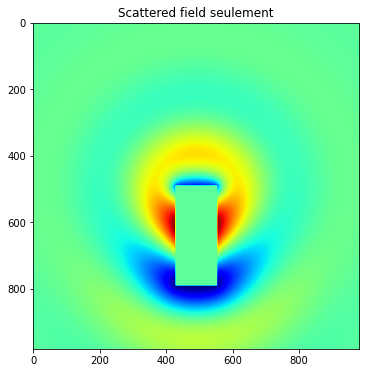

17.0
Fréquence=1468.91
Temps pour inverser la  matrice: 57.232 s.


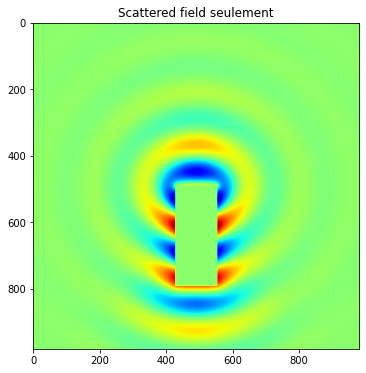

17.0
Fréquence=2309.50
Temps pour inverser la  matrice: 58.225 s.


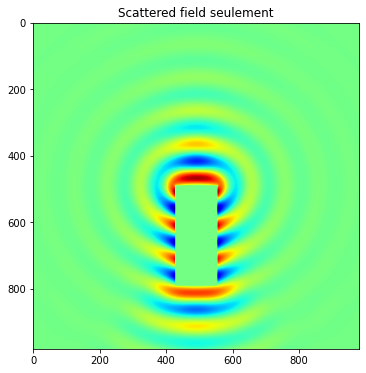

17.0
Fréquence=3150.08


KeyboardInterrupt: ignored

In [4]:
#1.1
SER=Main(1001,"rectangle",1.0)
#np.save("SER3_rectangle_5x12.npy", SER)

# Divers..

In [0]:
# # JM (avant )
# from joblib import Parallel, delayed
# import time 

# angle_arr=np.linspace(np.pi/8, np.pi/1.1,16)

# t0=time.perf_counter()
# Results=Parallel(n_jobs=4)(delayed(Test)(801,'triangle',angle) for angle in angle_arr)

# print("Temps de calcul: {}".format(time.perf_counter()-t0))

# np.save("Sweep_Trianglepi8api1p1v2.npy",np.array(Results))





KeyboardInterrupt: ignored

In [0]:
# Jie
from joblib import Parallel, delayed
import time 

# coeff_arr=np.linspace(1.0, 4.0,16)

# t0=time.perf_counter()
# Results=Parallel(n_jobs=4)(delayed(Test)(801,'cercle',coeff) for coeff in coeff_arr)

# print("Temps de calcul: {}".format(time.perf_counter()-t0))

# np.save("Sweep_Cercle1a4.npy",np.array(Results))




In [0]:
omega_arr=2*np.pi*np.linspace(100,300,3)
coeff_arr=np.array([4])#np.linspace(1.0, 4.0,2)
Results=Parallel(n_jobs=4)(delayed(Test)(401,'cercle',coeff) for coeff in coeff_arr)


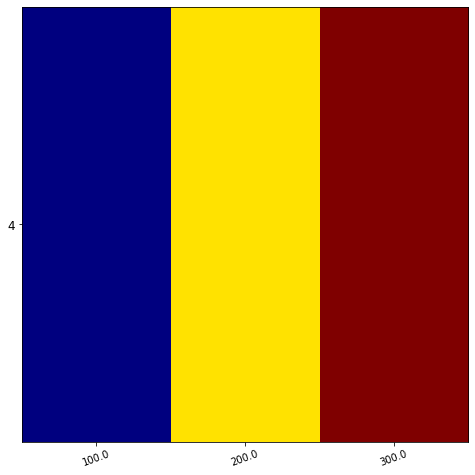

In [0]:

plt.figure(figsize=(8,8))

plt.imshow(np.array(Results), cmap="jet",interpolation="None",aspect="auto")
plt.yticks(np.arange(coeff_arr.shape[0]),np.round(coeff_arr,1),fontsize=12)
plt.xticks(np.arange(0,omega_arr.shape[0]),np.round(omega_arr[::]/2/np.pi,),rotation=20)
plt.show()

In [0]:
Results


[[31.99023466960556, 46.90110614108332, 54.20815620143206]]